In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [ ]:
mtcars = pd.read_csv("/content/mtcars.csv")
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<Axes: xlabel='qsec', ylabel='mpg'>

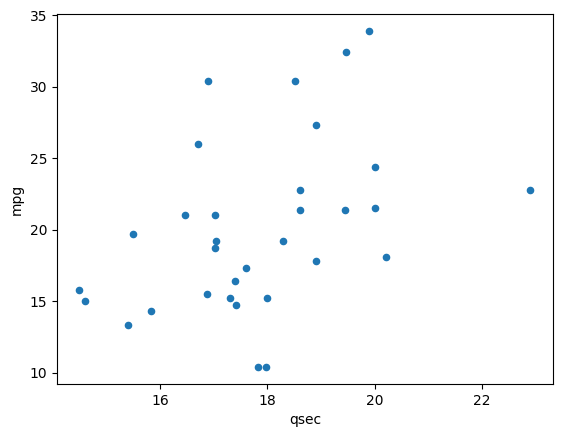

In [ ]:
## Um gráfico sem personalização diz muito menos do que poderia
mtcars.plot.scatter(x = "qsec",
                    y = "mpg")

<Axes: xlabel='qsec', ylabel='mpg'>

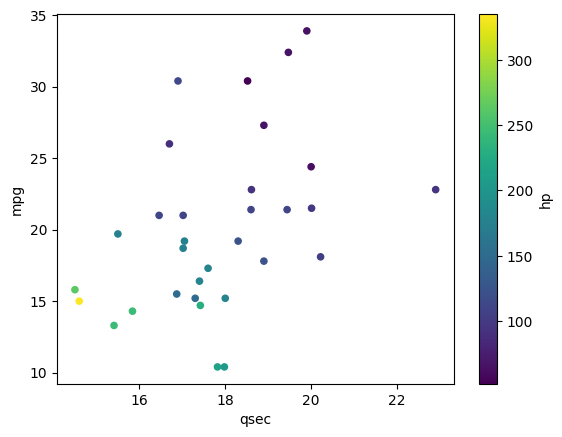

In [ ]:
## Com cores podemos contar uma história diferente.
mtcars.plot.scatter(x = "qsec",
                    y = "mpg",
                    c = "hp",
                    vmin = 52, # min de hp no banco
                    vmax = 335, # max de hp no banco
                    colormap='viridis')

<Axes: xlabel='qsec', ylabel='mpg'>

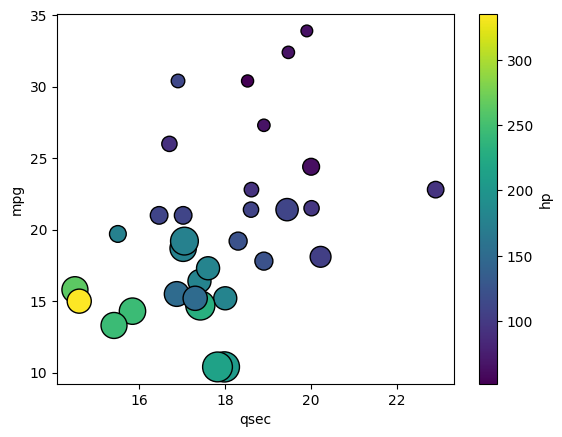

In [ ]:
## Podemos ainda usar o tamanho dos pontos para
## entender melhor os dados
mtcars.plot.scatter(x = "qsec",
                    y = "mpg",
                    c = "hp",
                    vmin = 52, # min de hp no banco
                    vmax = 335, # max de hp no banco
                    colormap='viridis',
                    s = "disp",
                    edgecolor = "black")

In [ ]:
oraculo = lambda qsec, mpg, disp :  (1/qsec)*(1/mpg)*disp*175

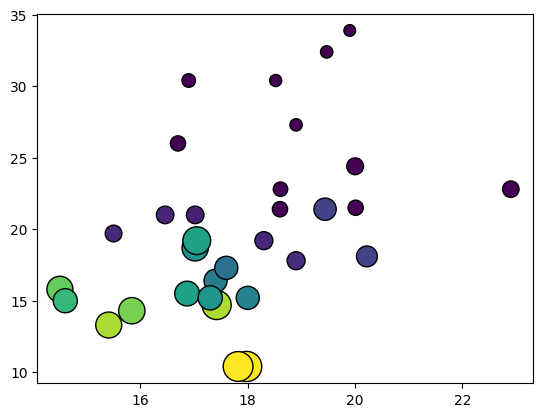

In [ ]:
## Plotando o oráculo
eixo_qsec = []
eixo_mpg  = []
eixo_disp = []
eixo_hp   = []

for i, row in mtcars.iterrows() :
    qsec = row["qsec"]
    mpg  = row["mpg"]
    disp = row["disp"]

    eixo_qsec.append(qsec)
    eixo_mpg.append(mpg)
    eixo_disp.append(disp)
    eixo_hp.append(oraculo(qsec,mpg,disp))


plt.scatter(x = eixo_qsec,
             y = eixo_mpg,
             c = eixo_hp,
             vmin = 52, # min de hp no banco
             vmax = 335, # max de hp no banco
             cmap='viridis',
             s = eixo_disp,
             edgecolor = "black"
        )

<Axes: xlabel='qsec', ylabel='mpg'>

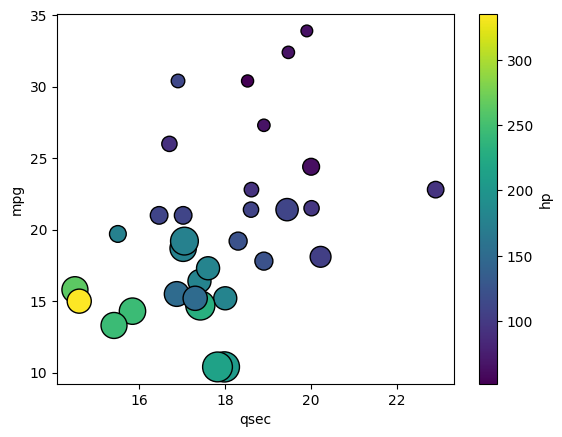

In [ ]:
## Podemos ainda usar o tamanho dos pontos para
## entender melhor os dados
mtcars.plot.scatter(x = "qsec",
                    y = "mpg",
                    c = "hp",
                    vmin = 52, # min de hp no banco
                    vmax = 335, # max de hp no banco
                    colormap='viridis',
                    s = "disp",
                    edgecolor = "black")

In [ ]:
## Utilizando os tensores do PyTorch
y = torch.tensor(mtcars.hp.values, dtype = torch.float)
x = torch.tensor(mtcars.loc[: , ["qsec", "mpg", "disp"]].values, dtype = torch.float)

In [ ]:
x

tensor([[ 16.4600,  21.0000, 160.0000],
        [ 17.0200,  21.0000, 160.0000],
        [ 18.6100,  22.8000, 108.0000],
        [ 19.4400,  21.4000, 258.0000],
        [ 17.0200,  18.7000, 360.0000],
        [ 20.2200,  18.1000, 225.0000],
        [ 15.8400,  14.3000, 360.0000],
        [ 20.0000,  24.4000, 146.7000],
        [ 22.9000,  22.8000, 140.8000],
        [ 18.3000,  19.2000, 167.6000],
        [ 18.9000,  17.8000, 167.6000],
        [ 17.4000,  16.4000, 275.8000],
        [ 17.6000,  17.3000, 275.8000],
        [ 18.0000,  15.2000, 275.8000],
        [ 17.9800,  10.4000, 472.0000],
        [ 17.8200,  10.4000, 460.0000],
        [ 17.4200,  14.7000, 440.0000],
        [ 19.4700,  32.4000,  78.7000],
        [ 18.5200,  30.4000,  75.7000],
        [ 19.9000,  33.9000,  71.1000],
        [ 20.0100,  21.5000, 120.1000],
        [ 16.8700,  15.5000, 318.0000],
        [ 17.3000,  15.2000, 304.0000],
        [ 15.4100,  13.3000, 350.0000],
        [ 17.0500,  19.2000, 400.0000],


In [ ]:
y

tensor([110., 110.,  93., 110., 175., 105., 245.,  62.,  95., 123., 123., 180.,
        180., 180., 205., 215., 230.,  66.,  52.,  65.,  97., 150., 150., 245.,
        175.,  66.,  91., 113., 264., 175., 335., 109.])

In [ ]:
## Computando máximo e mínimo de cada coluna
maximo = x.max(axis = 0).values
minimo = x.min(axis = 0).values

# ## Normalizando
xx = (x - minimo)/(maximo - minimo)

xx

tensor([[0.2333, 0.4511, 0.2218],
        [0.3000, 0.4511, 0.2218],
        [0.4893, 0.5277, 0.0920],
        [0.5881, 0.4681, 0.4662],
        [0.3000, 0.3532, 0.7206],
        [0.6810, 0.3277, 0.3839],
        [0.1595, 0.1660, 0.7206],
        [0.6548, 0.5957, 0.1886],
        [1.0000, 0.5277, 0.1739],
        [0.4524, 0.3745, 0.2407],
        [0.5238, 0.3149, 0.2407],
        [0.3452, 0.2553, 0.5106],
        [0.3690, 0.2936, 0.5106],
        [0.4167, 0.2043, 0.5106],
        [0.4143, 0.0000, 1.0000],
        [0.3952, 0.0000, 0.9701],
        [0.3476, 0.1830, 0.9202],
        [0.5917, 0.9362, 0.0190],
        [0.4786, 0.8511, 0.0115],
        [0.6429, 1.0000, 0.0000],
        [0.6560, 0.4723, 0.1222],
        [0.2821, 0.2170, 0.6159],
        [0.3333, 0.2043, 0.5809],
        [0.1083, 0.1234, 0.6957],
        [0.3036, 0.3745, 0.8204],
        [0.5238, 0.7191, 0.0197],
        [0.2619, 0.6638, 0.1227],
        [0.2857, 0.8511, 0.0599],
        [0.0000, 0.2298, 0.6982],
        [0.119

In [ ]:
## Adicione em xx uma nova coluna com valores iguais 1.
## Isso fará com que cada linha da matriz possua quatro
## valores: 1, qsec, mpg, disp.

## Você pode executar esse passo facilmente usando o
## comando torch.cat visto em sala de aula.
ones_column = torch.ones(xx.shape[0], 1)
xx = torch.cat([ones_column, xx], dim=1)

xx

tensor([[1.0000, 0.2333, 0.4511, 0.2218],
        [1.0000, 0.3000, 0.4511, 0.2218],
        [1.0000, 0.4893, 0.5277, 0.0920],
        [1.0000, 0.5881, 0.4681, 0.4662],
        [1.0000, 0.3000, 0.3532, 0.7206],
        [1.0000, 0.6810, 0.3277, 0.3839],
        [1.0000, 0.1595, 0.1660, 0.7206],
        [1.0000, 0.6548, 0.5957, 0.1886],
        [1.0000, 1.0000, 0.5277, 0.1739],
        [1.0000, 0.4524, 0.3745, 0.2407],
        [1.0000, 0.5238, 0.3149, 0.2407],
        [1.0000, 0.3452, 0.2553, 0.5106],
        [1.0000, 0.3690, 0.2936, 0.5106],
        [1.0000, 0.4167, 0.2043, 0.5106],
        [1.0000, 0.4143, 0.0000, 1.0000],
        [1.0000, 0.3952, 0.0000, 0.9701],
        [1.0000, 0.3476, 0.1830, 0.9202],
        [1.0000, 0.5917, 0.9362, 0.0190],
        [1.0000, 0.4786, 0.8511, 0.0115],
        [1.0000, 0.6429, 1.0000, 0.0000],
        [1.0000, 0.6560, 0.4723, 0.1222],
        [1.0000, 0.2821, 0.2170, 0.6159],
        [1.0000, 0.3333, 0.2043, 0.5809],
        [1.0000, 0.1083, 0.1234, 0

In [ ]:
## Inicialize a função de erro MSELoss
loss_fn = torch.nn.MSELoss()

In [ ]:
## Crie um vetor de coeficientes para multiplicar pela variável xx.
## O seu vetor de coeficientes deve ter tamanho 4 e deverá configurar
## requires_grad como True.
coef = torch.rand(4, requires_grad=True)
coef

## Execute o Treinamento

## ToDo: Configure as linhas abaixo como achar apropriado
max_learning_rate = 0.01 # 0.5
epochs = 1000000

for t in range(epochs):
    learning_rate = max_learning_rate * (1 - t/epochs)

    # ToDo Forward pass: Use o produto interno entre xx e
    # coef para gerar uma predição..
    y_pred = torch.inner(xx, coef)

    ## Computando o erro com a função de custo
    ## imprimindo o resultado algumas vezes na tela
    ## para ver se está funcionando.
    loss = loss_fn(y_pred, y)

    ## Imprimindo dez vezes o resultado do erro
    if t % (epochs / 10) == 0 :
        print(t, loss.item())

    ## Computando os gradientes
    loss.backward()

    # Atualizando os pesos usando a descida por gradiente.
    coef.data -= learning_rate * coef.grad.data

    # Limpando os gradientes antes da próxima iteração
    coef.grad.data.zero_()

0 25616.33203125
100000 844.8043212890625
200000 844.8043212890625
300000 844.8043212890625
400000 844.8043212890625
500000 844.8043212890625
600000 844.8043212890625
700000 844.8043212890625
800000 844.8043212890625
900000 844.8043212890625


In [ ]:
coef

tensor([ 203.7560, -138.9198,  -79.4787,   78.0779], requires_grad=True)

In [ ]:
def erro_quadratico_medio(y_pred, y) :
    erro = (y_pred - y) ** 2
    soma = torch.sum(erro)
    return soma.item()/y_pred.numel()

tensor([152.8053, 143.5439, 101.0333, 121.2551, 190.2740, 113.0893, 224.6700,
         80.1711,  36.4730, 129.9431, 124.7551, 175.3698, 169.0183, 169.5054,
        224.2814, 224.5904, 212.7676,  48.6363,  70.5273,  34.9717,  84.6332,
        195.3975, 186.5742, 233.2159, 195.8771,  75.3700, 124.1939, 101.0973,
        240.0051, 170.1571, 231.3192, 108.4654],
       grad_fn=<ReshapeAliasBackward0>)
844.8043212890625


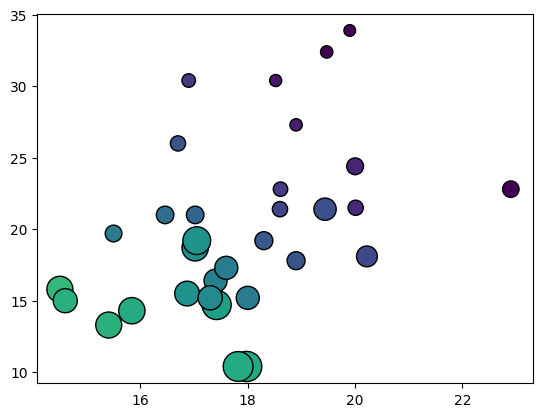

In [ ]:
## Plotando o oráculo
eixo_qsec = []
eixo_mpg  = []
eixo_disp = []
eixo_hp   = []

for i, row in mtcars.iterrows() :
    qsec = row["qsec"]
    mpg  = row["mpg"]
    disp = row["disp"]

    eixo_qsec.append(qsec)
    eixo_mpg.append(mpg)
    eixo_disp.append(disp)
    # eixo_hp.append(oraculo(qsec,mpg,disp))

oraculo = torch.inner(xx, coef)
print(oraculo)
erro = erro_quadratico_medio(oraculo, y)
print(erro)

# print(erro_quadratico_medio(torch.FloatTensor(eixo_hp), y))

plt.scatter(x = eixo_qsec,
             y = eixo_mpg,
             c = oraculo.tolist(),
             vmin = 52, # min de hp no banco
             vmax = 335, # max de hp no banco
             cmap='viridis',
             s = eixo_disp,
             edgecolor = "black"
        )